In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [12]:
years_mapping={"Less than 1 year":0.5,"More than 50 yers":51}
df["YearsCodePro"]=df["YearsCodePro"].replace(years_mapping)

In [13]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors='coerce')
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

In [15]:
df["YearsCodePro"].fillna(df["YearsCodePro"].median(),inplace=True)

/tmp/ipykernel_865/1537741564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].fillna(df["YearsCodePro"].median(),inplace=True)


In [16]:
df["Age"].fillna(df["Age"].median(),inplace=True)

/opt/conda/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_865/860536840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)


In [17]:
df["CompTotal"].fillna(df["CompTotal"].median(),inplace=True)

/tmp/ipykernel_865/2927376327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CompTotal"].fillna(df["CompTotal"].median(),inplace=True)


In [18]:
correlation = df[["Age", "CompTotal", "YearsCodePro"]].corr(method="pearson")

# Display correlation with Age
print("Correlation with Age:")
print(correlation["Age"])

Correlation with Age:
Age            NaN
CompTotal      NaN
YearsCodePro   NaN
Name: Age, dtype: float64


In [19]:
num_cols = ['Age', 'CompTotal', 'YearsCodePro']

# Compute the correlation matrix
correlation = df[num_cols].corr()

# Display the correlation
print(correlation)

              Age  CompTotal  YearsCodePro
Age           NaN        NaN           NaN
CompTotal     NaN   0.000000     -0.001022
YearsCodePro  NaN  -0.001022      1.000000


In [20]:
print("Correlation between Age and CompTotal:", df['Age'].corr(df['CompTotal']))
print("Correlation between Age and YearsCodePro:", df['Age'].corr(df['YearsCodePro']))

Correlation between Age and CompTotal: nan
Correlation between Age and YearsCodePro: nan


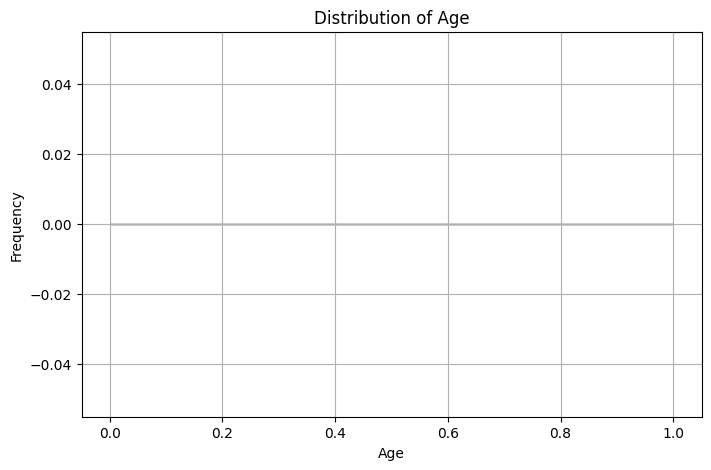

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
print(df.isna().sum())

ResponseId                 0
MainBranch                 0
Age                    65437
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [23]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['YearsCodePro'].fillna(df['YearsCodePro'].median(), inplace=True)

/opt/conda/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_865/2406227818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_865/2406227818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method wi

In [11]:
num_cols = ['Age', 'CompTotal', 'YearsCodePro']

# Compute the correlation matrix
correlation = df[num_cols].corr()

# Display the correlation
print(correlation)

              Age  CompTotal  YearsCodePro
Age           NaN        NaN           NaN
CompTotal     NaN   0.000000     -0.001751
YearsCodePro  NaN  -0.001751      1.000000


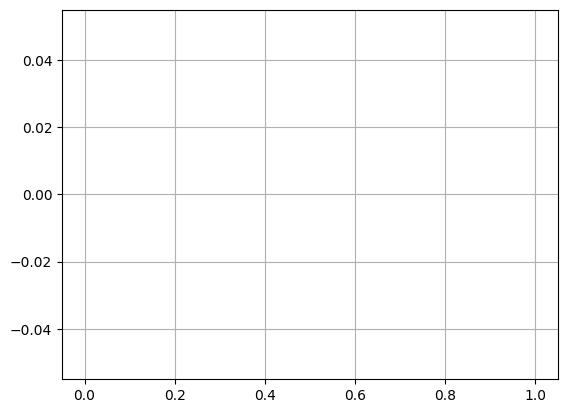

In [24]:
age_hist = df['Age'].hist()

<Axes: xlabel='CompTotal'>

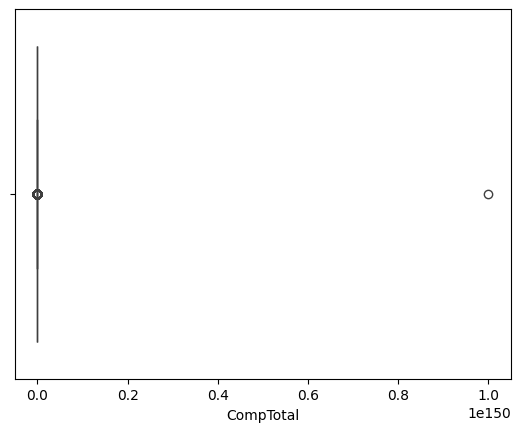

In [26]:
sns.boxplot(data=df['CompTotal'], orient = 'h')

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='Age', y='CompTotal', alpha=0.6)

plt.title('Relationship Between Age and Compensation')
plt.xlabel('Age')
plt.ylabel('Total Compensation (CompTotal)')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df_scatter' is not defined

<Figure size 1000x600 with 0 Axes>

ValueError: List of boxplot statistics and `positions` values must have same the length

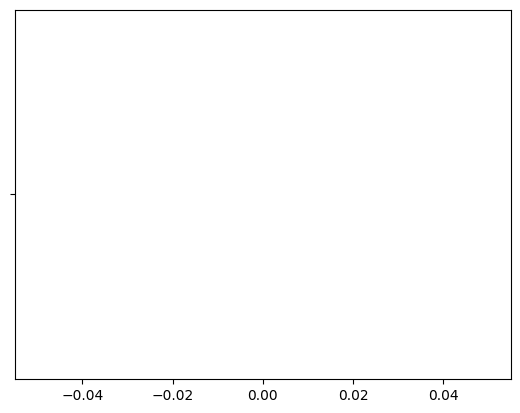

In [29]:
sns.boxplot(x=df['Age'])